Import modules and libraries required for project

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import seaborn as sns

/Users/jitsen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Import data pertaining to air quality measures

In [9]:
Air_Qual = pd.read_csv('Air_Qual.csv')

Death_2012_1 = pd.read_csv('Underlying Cause of Death, 2012.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2012_1['Year'] = 2012
Death_2013_1 = pd.read_csv('Underlying Cause of Death, 2013.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2013_1['Year'] = 2013
Death_2014_1 = pd.read_csv('Underlying Cause of Death, 2014.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2014_1['Year'] = 2014
Death_2015_1 = pd.read_csv('Underlying Cause of Death, 2015.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2015_1['Year'] = 2015

Import data on diabetes

In [10]:
Diabetes = pd.read_csv('Diabetes.csv',sep=',', usecols = ['State','County','Prevalence, 1999, Both Sexes',
'Prevalence, 2000, Both Sexes','Prevalence, 2001, Both Sexes','Prevalence, 2002, Both Sexes',
'Prevalence, 2003, Both Sexes','Prevalence, 2004, Both Sexes','Prevalence, 2005, Both Sexes', 
'Prevalence, 2006, Both Sexes','Prevalence, 2007, Both Sexes','Prevalence, 2008, Both Sexes',
'Prevalence, 2009, Both Sexes','Prevalence, 2010, Both Sexes','Prevalence, 2011, Both Sexes',
'Prevalence, 2012, Both Sexes'])  

pandas_dict = {}
Year_list = [(2000,'2000'),(2001,'2001'),(2002,'2002'),(2003,'2003'),(2004,'2004'),
             (2005,'2005'),(2006,'2006'),(2007,'2007'),(2008,'2008'),(2009,'2009'),
             (2010,'2010'),(2011,'2011'),(2012,'2012')]
for k,v in Year_list:
    pandas_dict[k] = Diabetes[['State','County','Prevalence, %r, Both Sexes' %k]]

Diabetes_list = []
Diabetes = pd.DataFrame()
for k,v in pandas_dict.items():
    v['Year'] = k
    v.columns.values[2] = 'Prevalence of Diabetes'
    Diabetes_list.append(v)
Diabetes_Concat = pd.concat(Diabetes_list)
Diabetes_Concat['County'] = Diabetes_Concat['County'].apply(lambda x: x.split()[0])

Import data on poverty

In [11]:
import glob
import errno
import os
path = '/Users/jitsen/Documents/metis/metisgh/CDC/Poverty'
content = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    content.append(filename)
    
Poverty = pd.read_csv(content[0],usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                           'Median Household Income in Dollars','County ID'])
for i in content[1:]:
    Poverty = pd.concat([Poverty, pd.read_csv(i,usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                                          'Median Household Income in Dollars','County ID'])])

In [12]:
Poverty['County'] = Poverty['State / County Name'].apply(lambda x : x.split()[0])
Poverty['State'] = Poverty['State / County Name'].apply(lambda x : x.split()[-1][1:3])
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam',
        'HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
        'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
        'NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
        'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia',
        'VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

Poverty['State'] = Poverty['State'].map(states)

Poverty['Median_Income'] = Poverty['Median Household Income in Dollars'].apply(lambda x : re.sub('[^0-9]','',str(x)))
Poverty['Median_Income'] = pd.to_numeric(Poverty['Median_Income'], errors='coerce')

Merge Tables on Diabetes and Poverty

In [13]:
Diabetes_Poverty= pd.merge(Diabetes_Concat, Poverty,left_on = ['County','Year','State'],
                  right_on = ['County','Year','State'])

Checking if Intergerity if tables were preserved

In [14]:
Diabetes_Poverty['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012])

Select the correct metric for air pollution measurement (P2.5 density)

In [15]:
Air_Qual_2_5 = Air_Qual[Air_Qual['MeasureId']==296]

Merge data on diabetes, poverty and air quality

In [16]:
Diabetes_Poverty_Air_Qual_2_5 = pd.merge(Diabetes_Poverty,Air_Qual_2_5,
                left_on = ['County','Year','State'], 
                                right_on = ['CountyName','ReportYear','StateName'])

Make squared term for air pollution in case relationship to death is not linear

In [17]:
Diabetes_Poverty_Air_Qual_2_5['Value_sq'] = Diabetes_Poverty_Air_Qual_2_5['Value'].apply(
lambda x: x**2 )

Create tables in order to find moving averages of features (to be used later)

In [18]:
DPA_2008 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2001)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2008)]
DPA_2009 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2002)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2009)]
DPA_2010 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2003)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2010)]
DPA_2011 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2004)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2011)]


In [19]:
DPA_2008_mean = DPA_2008[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq','CountyFips']].groupby(['State','County']).mean()
DPA_2008_mean = DPA_2008_mean.reset_index()
DPA_2008_mean['Comp_Year'] = 2012

DPA_2009_mean = DPA_2009[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq','CountyFips']].groupby(['State','County']).mean()
DPA_2009_mean = DPA_2009_mean.reset_index()
DPA_2009_mean['Comp_Year'] = 2013

DPA_2010_mean = DPA_2010[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq','CountyFips']].groupby(['State','County']).mean()
DPA_2010_mean = DPA_2010_mean.reset_index()
DPA_2010_mean['Comp_Year'] = 2014

DPA_2011_mean = DPA_2011[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq','CountyFips']].groupby(['State','County']).mean()
DPA_2011_mean = DPA_2011_mean.reset_index()
DPA_2011_mean['Comp_Year'] = 2015


Make master tables of information on deaths and other features

In [20]:
Death_concat = pd.concat([Death_2012_1,Death_2013_1,
               Death_2014_1,Death_2015_1])

Death_new = Death_concat[['State','County','2013 Urbanization','2013 Urbanization Code',
'Five-Year Age Groups','Deaths','Population','Year','ICD Sub-Chapter']]
Death_new['County'] = Death_new.County.str.split().str[0]
cols = ['State','County','2013 Urbanization','2013 Urbanization Code',
'Five-Year Age Groups','Deaths','Population','Year','ICD Sub-Chapter']
Death_new = Death_new.loc[:, cols].dropna()

DPA_concat = pd.concat([DPA_2008_mean,DPA_2009_mean,DPA_2010_mean,DPA_2011_mean])


/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Merge above tables

In [21]:
Death_DPA_merge = pd.merge(DPA_concat, Death_new,left_on = ['State','County','Comp_Year'],
                          right_on = ['State','County','Year'])

Select only IHD (Ischaemic Heart Disease) for analysis

In [22]:
Death_DPA_merge = Death_DPA_merge[Death_DPA_merge['Population'] != 'Not Applicable']
Death_DPA_merge['Population'] = Death_DPA_merge['Population'].astype('int')
Death_DPA_merge['prop_death'] = Death_DPA_merge['Deaths']/Death_DPA_merge['Population']
Death_DPA_merge['Five-Year Age Groups'] = Death_DPA_merge['Five-Year Age Groups'].apply(
lambda x : (int(x[3:5])+int(x[0:2]))/2)
Death_DPA_merge
Death_DPA_merge_IHD = Death_DPA_merge[Death_DPA_merge['ICD Sub-Chapter'] == 'Ischaemic heart diseases']

In [23]:
Death_DPA_merge_IHD.head()

,State,County,Prevalence of Diabetes,Year_x,Median_Income,All Ages in Poverty Percent,Value,Value_sq,CountyFips,Comp_Year,2013 Urbanization,2013 Urbanization Code,Five-Year Age Groups,Deaths,Population,Year_y,ICD Sub-Chapter,prop_death
0,Alabama,Autauga,9.64250,2004.5,46018.875,10.8875,13.236328,175.600726,1001.0,2012,Medium Metro,3.0,82.0,10.0,824,2012,Ischaemic heart diseases,0.012136
2,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,1003.0,2012,Small Metro,4.0,57.0,16.0,13594,2012,Ischaemic heart diseases,0.001177
3,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,1003.0,2012,Small Metro,4.0,62.0,16.0,12681,2012,Ischaemic heart diseases,0.001262
4,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,1003.0,2012,Small Metro,4.0,67.0,19.0,11523,2012,Ischaemic heart diseases,0.001649
5,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,1003.0,2012,Small Metro,4.0,72.0,25.0,8551,2012,Ischaemic heart diseases,0.002924


Add geo-coordinates to master dataset as an added feature

In [24]:
Geo_coord = pd.read_csv('zip_codes_states.csv')
Geo_coord['state'] = Geo_coord['state'].map(states)
Geo_coord_mean = Geo_coord.groupby(['state','county',]).mean()
Geo_coord_mean = Geo_coord_mean.reset_index()
Death_m_concat_geo = pd.merge(Death_DPA_merge_IHD,Geo_coord_mean, left_on = ['State','County'],
                              right_on = ['state','county'])


In [25]:
Death_m_concat_geo['Value_Age']  = Death_m_concat_geo['Value']*Death_m_concat_geo['Five-Year Age Groups']
Death_m_concat_geo['Value_Poverty'] = Death_m_concat_geo['Value']*Death_m_concat_geo['All Ages in Poverty Percent']

In [26]:
def cause(age_group, metro):   
    #new_df5 = new_df5[new_df5['Value'] < 40]
    df = Death_m_concat_geo[Death_m_concat_geo['Five-Year Age Groups'] == age_group]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    df = df[df['2013 Urbanization'] == metro]
    new_list = [x for x in zip(df['prop_death'],df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2


Run EDA having controlled for Metro size and age group

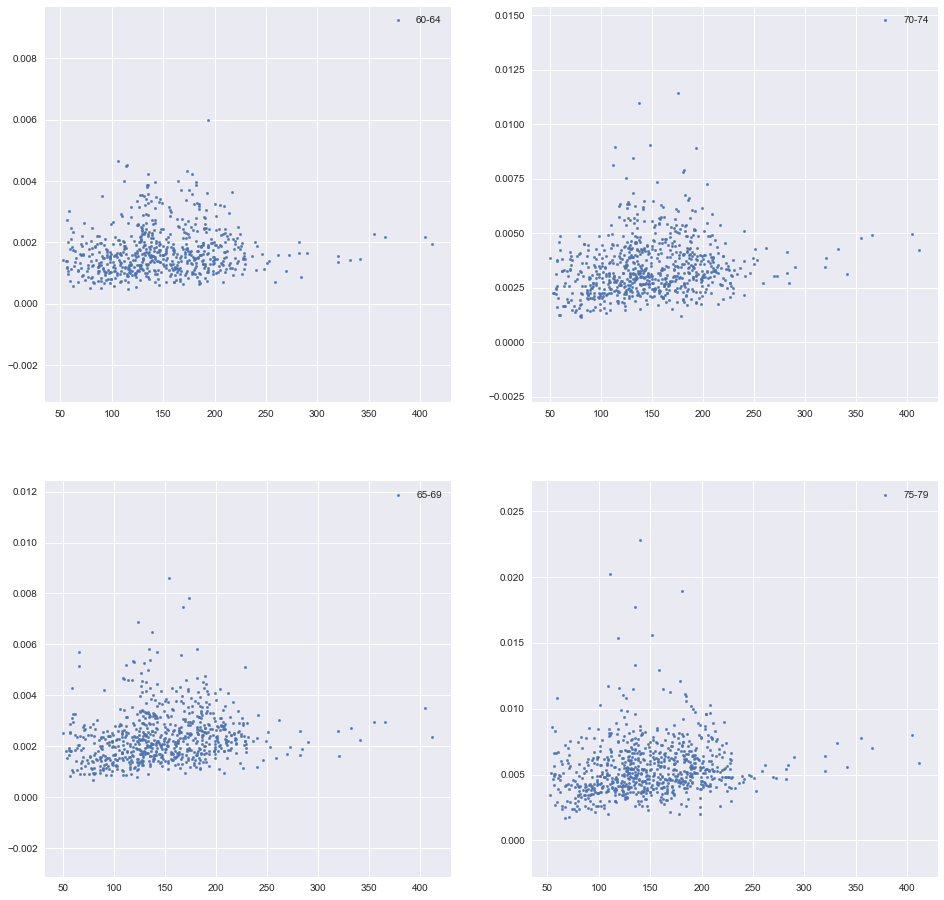

In [27]:
fig, axes = plt.subplots(2, 2, figsize = (16,16));
axes[0,0].scatter([x[1] for x in cause(62, 'Medium Metro') ],[x[0] for x in cause(62, 'Medium Metro')], 
            label = '60-64',s=6);
axes[1,0].scatter([x[1] for x in cause(67, 'Medium Metro') ],[x[0] for x in cause(67, 'Medium Metro')], 
            label = '65-69',s=6);
axes[0,1].scatter([x[1] for x in cause(72, 'Medium Metro') ],[x[0] for x in cause(72, 'Medium Metro')], 
            label = '70-74', s=6);
axes[1,1].scatter([x[1] for x in cause(77, 'Medium Metro') ],[x[0] for x in cause(77, 'Medium Metro')], 
            label = '75-79', s=6);

axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
plt.show();

Control for all confounders and run EDA (with hope to see relationship between proportion of deaths and particulate matter density)

In [28]:
X = Death_m_concat_geo[['Comp_Year','Prevalence of Diabetes','Median_Income',
       'All Ages in Poverty Percent','2013 Urbanization Code','Five-Year Age Groups',
      'Population','latitude', 'longitude','Value_Age','Value_Poverty']]

scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X)
k_means = cluster.KMeans(n_clusters=80)
X_fit = k_means.fit(X_)
labels = X_fit.labels_
Death_m_concat_geo['clusters'] = labels

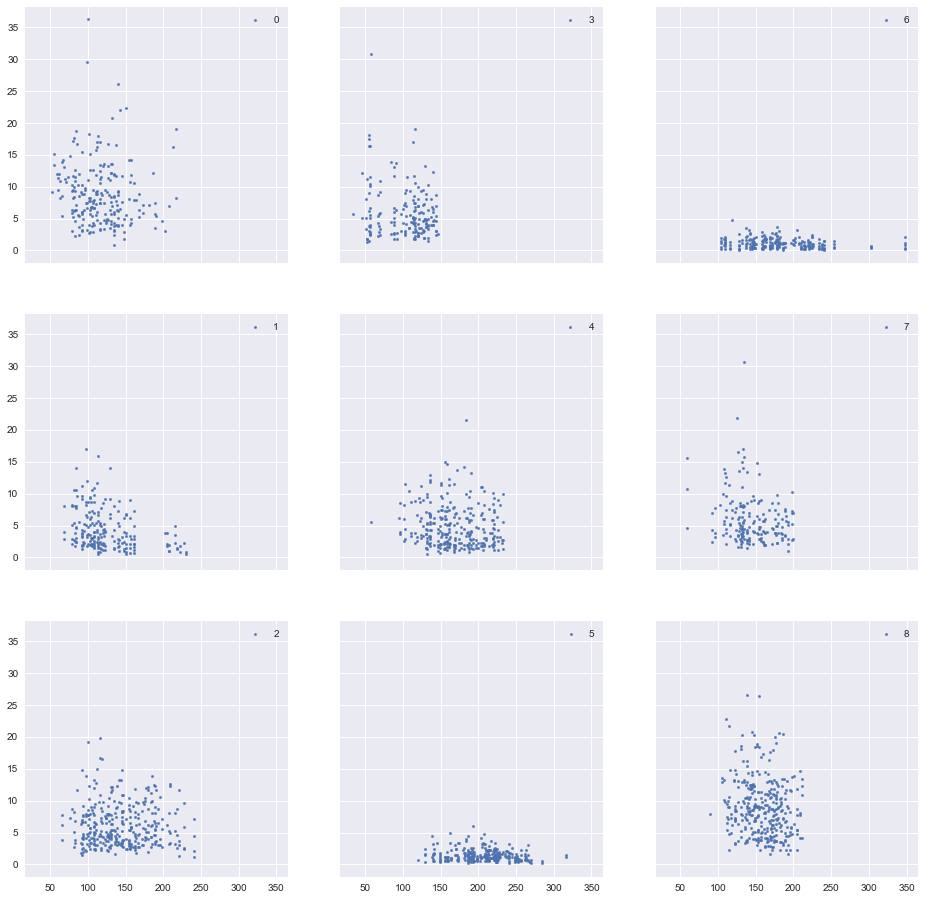

In [29]:
def cause_3(cluster):   
    df = Death_m_concat_geo[Death_m_concat_geo['clusters'] == cluster]
    #new_df5 = new_df5[new_df5['Value'] < 40]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    new_list = [x for x in zip(df['prop_death']*1000,df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

fig, axes = plt.subplots(3, 3, figsize = (16,16), sharey=True, sharex = True);
axes[0,0].scatter([x[1] for x in cause_3(0) ],[x[0] for x in cause_3(0)], 
            label = '0',s=6);
axes[1,0].scatter([x[1] for x in cause_3(1) ],[x[0] for x in cause_3(1)], 
            label = '1',s=6);
axes[2,0].scatter([x[1] for x in cause_3(2) ],[x[0] for x in cause_3(2)], 
            label = '2', s=6);
axes[0,1].scatter([x[1] for x in cause_3(3) ],[x[0] for x in cause_3(3)], 
            label = '3', s=6);
axes[1,1].scatter([x[1] for x in cause_3(4) ],[x[0] for x in cause_3(4)], 
            label = '4', s=6);
axes[2,1].scatter([x[1] for x in cause_3(5) ],[x[0] for x in cause_3(5)], 
            label = '5', s=6);
axes[0,2].scatter([x[1] for x in cause_3(6) ],[x[0] for x in cause_3(6)], 
            label = '6', s=6);
axes[1,2].scatter([x[1] for x in cause_3(7) ],[x[0] for x in cause_3(7)], 
            label = '7', s=6);
axes[2,2].scatter([x[1] for x in cause_3(8) ],[x[0] for x in cause_3(8)], 
            label = '8', s=6);
axes[0,0].legend();
axes[1,0].legend();
axes[2,0].legend();
axes[0,1].legend();
axes[1,1].legend();
axes[2,1].legend();
axes[0,2].legend();
axes[1,2].legend();
axes[2,2].legend();

plt.show();

Control for confounders manually

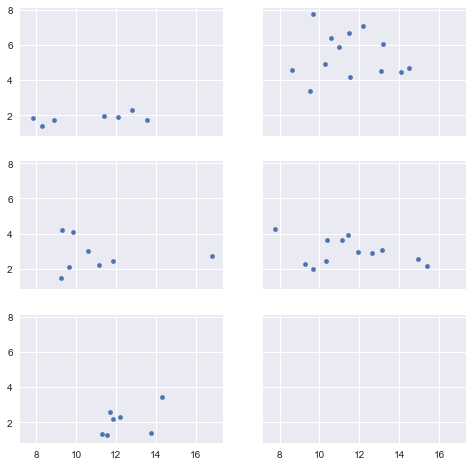

In [31]:
A = 40000
B = 50000
C = 10
D = 12
E = 8
F = 10
G = 3.0
H = 77 
I = 77
J = 2015

def cause_3(A,B,C,D,E,F,G,H,I,J):
    Death_Select = Death_m_concat_geo[(Death_m_concat_geo['Median_Income'].between(A, B, inclusive=True) & 
    Death_m_concat_geo['All Ages in Poverty Percent'].between(C, D, inclusive=True) &
    Death_m_concat_geo['Prevalence of Diabetes'].between(E, F, inclusive=False) &
          (Death_m_concat_geo['2013 Urbanization Code'] == G) &
    Death_m_concat_geo['Five-Year Age Groups'].between(H, I, inclusive=True)) &
    (Death_m_concat_geo['Comp_Year'] == J)]
    #new_df5 = new_df5[new_df5['Value'] < 40]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    new_list = [x for x in zip(Death_Select['prop_death']*1000,Death_Select['Value'],
                               Death_Select['County']+" "+Death_Select['State'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

fig, ax = plt.subplots(3,2,figsize = (8,8), sharey = True, sharex = True);
ax[0,0].scatter([x[1] for x in cause_3(45000,50000,10,12,8,10,3.0,67,67,2015)],
            [x[0] for x in cause_3(45000,50000,10,12,8,10,3.0,67,67,2015)], 
            label = '0',s=20);

ax[0,1].scatter([x[1] for x in cause_3(40000,45000,13,15,8,10,3.0,77,77,2015)],
           [x[0] for x in cause_3(40000,45000,13,15,8,10,3.0,77,77,2015)], 
            label = '1',s=20);

ax[1,0].scatter([x[1] for x in cause_3(50000,55000,8,10,6,8,3.0,72,72,2012)],
            [x[0] for x in cause_3(50000,55000,8,10,6,8,3.0,72,72,2012)], 
            label = '2',s=20);

ax[1,1].scatter([x[1] for x in cause_3(50000,55000,8,10,7,9,3.0,72,72,2014)],
           [x[0] for x in cause_3(50000,55000,8,10,7,9,3.0,72,72,2014)], 
           label = '3',s=20);

ax[2,0].scatter([x[1] for x in cause_3(40000,45000,15,17,9,11,3.0,67,67,2013)],
           [x[0] for x in cause_3(40000,45000,15,17,9,11,3.0,67,67,2013)], 
           label = '4',s=20);
#for i, txt in enumerate([x[2] for x in cause_3(A,B,C,D,E,F,G,H,I,J)]):
#    ax.annotate(txt, ([x[1] for x in cause_3(A,B,C,D,E,F,G,H,I,J)][i],
#                      [x[0] for x in cause_3(A,B,C,D,E,F,G,H,I,J)][i]),
#      fontsize = 6);

axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
axes[2,0].legend();
plt.show();


look at distribution of death counts

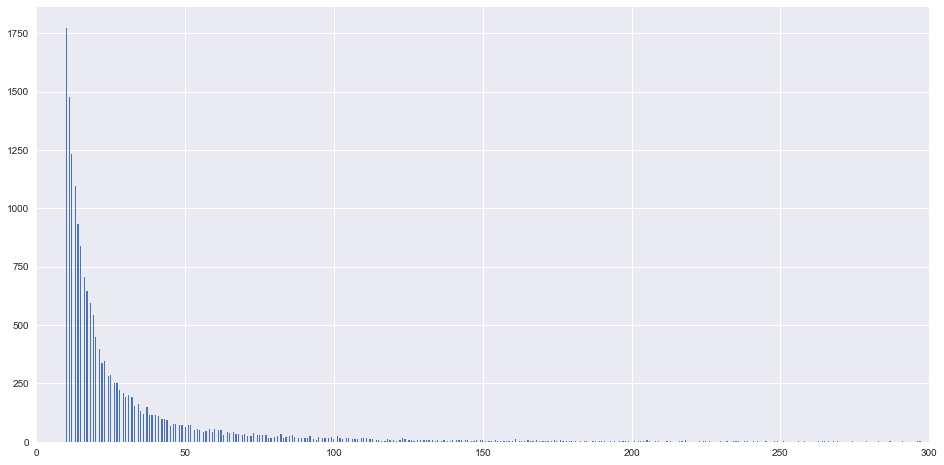

In [32]:
plt.figure(figsize = (16,8));
plt.hist(Death_m_concat_geo['Deaths'],bins=2000);
plt.xlim(0,300);
plt.show();

Run poisson model using all features to predit death counts per county, per age group

In [33]:
X_sm = Death_m_concat_geo[['Comp_Year','Prevalence of Diabetes',
       'All Ages in Poverty Percent','Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_sm_spec = X_sm[(X_sm['Five-Year Age Groups']>=1)&
                (X_sm['Population']>=1)&(X_sm['Population']<=1000000) &
                (X_sm['Value']>=1)]

y_sm_spec  = Death_m_concat_geo[(Death_m_concat_geo['Five-Year Age Groups']>=1)&
                               (Death_m_concat_geo['Population']>=1)&(Death_m_concat_geo['Population']<=1000000)
                               & (X_sm['Value']>=1)]

y_sm_spec = y_sm_spec['prop_death']*1000

scaler = MinMaxScaler(feature_range=(0, 1))
X_sm_t = scaler.fit_transform(X_sm_spec)

#X_sm_t = pd.DataFrame(X_sm_t, columns = ["Year","Five-Year Age Groups",'Median_Income',
#                   'All Ages in Poverty Percent','Prevalence of Diabetes',
#'2013 Urbanization Code','Value'])
X_sm_t_new = sm.add_constant(X_sm_t)

X_train, X_test, y_train, y_test = train_test_split(X_sm_t_new, y_sm_spec, test_size = .3)

sm_pois = sm.GLM(y_train,X_train, family =  Poisson()).fit_regularized()
sm_pois.params

const   -0.895915
x1      -0.103169
x2       0.589696
x3       0.433934
x4       0.034869
x5       0.361086
x6       0.013830
x7       0.033756
x8      -6.274840
x9       2.645748
dtype: float64

In [34]:
X_sm.corr()

,Comp_Year,Prevalence of Diabetes,All Ages in Poverty Percent,Value,2013 Urbanization Code,latitude,longitude,Population,Five-Year Age Groups
Comp_Year,1.000000,0.206390,0.111642,-0.190589,0.013327,-0.009528,-0.006463,0.004849,0.005787
Prevalence of Diabetes,0.206390,1.000000,0.768587,0.184881,0.137444,-0.485158,0.109967,-0.038299,-0.037436
All Ages in Poverty Percent,0.111642,0.768587,1.000000,-0.054437,0.326822,-0.357370,-0.134860,-0.045710,-0.007802
Value,-0.190589,0.184881,-0.054437,1.000000,-0.244331,0.052502,0.269885,0.151251,-0.100881
2013 Urbanization Code,0.013327,0.137444,0.326822,-0.244331,1.000000,0.028171,-0.041182,-0.481514,0.276678
latitude,-0.009528,-0.485158,-0.357370,0.052502,0.028171,1.000000,-0.016022,-0.038881,0.068253
longitude,-0.006463,0.109967,-0.134860,0.269885,-0.041182,-0.016022,1.000000,-0.028271,-0.009048
Population,0.004849,-0.038299,-0.045710,0.151251,-0.481514,-0.038881,-0.028271,1.000000,-0.504091
Five-Year Age Groups,0.005787,-0.037436,-0.007802,-0.100881,0.276678,0.068253,-0.009048,-0.504091,1.000000


In [35]:
y_pred = sm_pois.predict(X_test)

def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(y_test,y_pred)

0.69209717419146455

Run linear model to do the same

In [36]:
Death_m_concat_geo_2 = Death_m_concat_geo[Death_m_concat_geo['Five-Year Age Groups']>=1]

X_lr_1 = Death_m_concat_geo_2[['Comp_Year','Prevalence of Diabetes',
       'All Ages in Poverty Percent', 'Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_lr_2 = Death_m_concat_geo_2[['Comp_Year','Prevalence of Diabetes',
       'All Ages in Poverty Percent','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_lr_3 = Death_m_concat_geo_2[['Value','Value_sq']]

y_lr = Death_m_concat_geo_2['Deaths']

scaler = MinMaxScaler(feature_range=(0, 1))

X_lr_t1 = scaler.fit_transform(X_lr_1)
X_lr_t2 = scaler.fit_transform(X_lr_2)
X_lr_t3 = scaler.fit_transform(X_lr_3)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

lr1.fit(X_lr_t1, y_lr)
lr2.fit(X_lr_t2, y_lr)
lr3.fit(X_lr_t3, y_lr)

print(lr1.score(X_lr_t1, y_lr),lr2.score(X_lr_t2, y_lr),lr3.score(X_lr_t3, y_lr))

0.386373197939 0.38446403035 0.0529659368081


Run Random Forest model to predict death counts

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_1, Death_m_concat_geo_2['prop_death']*1000, test_size=0.3)
for i in range(10)[1:]:    
    rand_forest = RandomForestRegressor(n_estimators=5+i, min_samples_split=2*(i))
    rand_forest.fit(X_train, y_train)
    y_test_pred_rand_forest = rand_forest.predict(X_test)
    print('n_estimators:',(5+i), rand_forest.score(X_test,y_test),
          'min_samples_split:',5*(i), rand_forest.score(X_train, y_train),
         rand_forest.feature_importances_)

n_estimators: 6 0.875946790292 min_samples_split: 5 0.977157633523 [ 0.00579846  0.02538285  0.01751859  0.0165426   0.00457759  0.02106112
  0.01774427  0.31409415  0.57728035]
n_estimators: 7 0.882120782603 min_samples_split: 10 0.972101324689 [ 0.00538265  0.02583655  0.01756468  0.01560156  0.00497864  0.01960919
  0.01719128  0.30741237  0.58642309]
n_estimators: 8 0.883211899839 min_samples_split: 15 0.968021249828 [ 0.00464846  0.02502892  0.01660726  0.01502491  0.0033904   0.01815506
  0.01805778  0.3063276   0.59275962]
n_estimators: 9 0.888607235273 min_samples_split: 20 0.96296850793 [ 0.00439266  0.02454424  0.01551111  0.01395633  0.00361939  0.0172563
  0.01563569  0.30797261  0.59711166]
n_estimators: 10 0.890481194353 min_samples_split: 25 0.959574592662 [ 0.00395866  0.02266718  0.01303884  0.01317413  0.00393569  0.01565415
  0.01475061  0.31519007  0.59763067]
n_estimators: 11 0.89016578566 min_samples_split: 30 0.955825484458 [ 0.0035774   0.02208255  0.01240691  0

Create CSV file for D3 visualization of pollution concentration by geographic area

In [ ]:
Death_d3 = Air_Qual_2_5[['CountyFips','Value','ReportYear']]
Death_d3['CountyFips'] = Death_d3['CountyFips'].astype(int)
Death_d3 = Death_d3[Death_d3['ReportYear'] == 2011].groupby(Death_d3['CountyFips']).mean()
Death_d3['CountyFips'] = Death_d3['CountyFips'].apply(lambda x : '0'+str(x) if len(str(x))==4 else 
                                                      str(x))
Death_d3['id'] = Death_d3['CountyFips'].astype(str)+'\t'+Death_d3['Value'].astype(str)
Death_d3['id'].to_csv('unemployment.tsv', index = False, encoding = 'utf8')

Create CSV file for D3 visualization of poverty geographic dispersion

In [ ]:
Poverty_d3 =Poverty[['All Ages in Poverty Percent','County ID','Year']]
Poverty_d3 = Diabetes_d3.dropna()
Poverty_d3['County ID'] = Diabetes_d3['County ID'].astype(int)
Poverty_d3['County ID'] = Diabetes_d3['County ID'].apply(lambda x : '0'+str(x) if len(str(x))==4 else 
                                                      str(x))
Poverty_d3 = Diabetes_d3[Diabetes_d3['Year']== 2011]
Poverty_d3['id'] = Diabetes_d3['County ID'].astype(str)+'\t'+Diabetes_d3['All Ages in Poverty Percent'].astype(str)
Poverty_d3['id'].to_csv('poverty.tsv', index = False, encoding = 'utf8')